# FrozenLake-v1 – Eredmények elemzése

Ebben a notebookban a SARSA és a Q-learning algoritmusok teljesítményét
vizsgálom a FrozenLake környezetben.

A hangsúly:
- a tanulási dinamika vizsgálatán,
- a seed-ek feletti stabilitáson,
- az on-policy és off-policy különbségek értelmezésén van.


In [1]:
import sys
from pathlib import Path

# Add parent directory to path to import utils
sys.path.insert(0, str(Path.cwd().parent))

import matplotlib.pyplot as plt
from util import aggregate_by_episode, load_logs, moving_average

sarsa = load_logs("FrozenLake-v1", "SARSA")
qlearning = load_logs("FrozenLake-v1", "Q-learning")


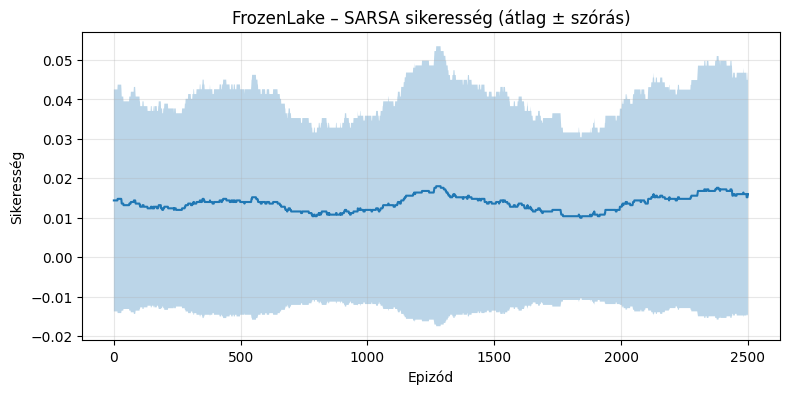

In [2]:
mean, std = aggregate_by_episode(sarsa, "success")

y = moving_average(mean.values, 500)
y_std = moving_average(std.fillna(0).values, 500)
x = mean.index[:len(y)]

plt.figure(figsize=(9, 4))
plt.plot(x, y, label="SARSA")
plt.fill_between(x, y - y_std, y + y_std, alpha=0.3)

plt.xlabel("Epizód")
plt.ylabel("Sikeresség")
plt.title("FrozenLake – SARSA sikeresség (átlag ± szórás)")
plt.grid(True, alpha=0.3)
plt.show()


A SARSA tanulása fokozatos és stabil.
A szórás viszonylag alacsony, ami arra utal, hogy az algoritmus
különböző seed-ek esetén hasonló policy-t tanul.


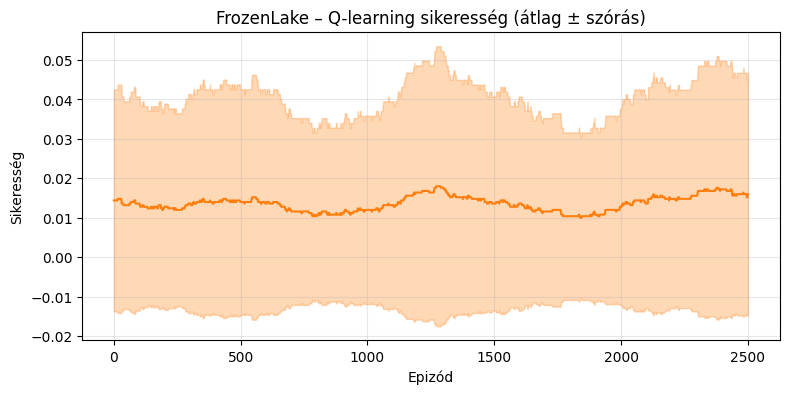

In [3]:
mean, std = aggregate_by_episode(qlearning, "success")

y = moving_average(mean.values, 500)
y_std = moving_average(std.fillna(0).values, 500)
x = mean.index[:len(y)]

plt.figure(figsize=(9, 4))
plt.plot(x, y, label="Q-learning", color="tab:orange")
plt.fill_between(x, y - y_std, y + y_std, alpha=0.3, color="tab:orange")

plt.xlabel("Epizód")
plt.ylabel("Sikeresség")
plt.title("FrozenLake – Q-learning sikeresség (átlag ± szórás)")
plt.grid(True, alpha=0.3)
plt.show()


A Q-learning tanulása gyorsabb kezdeti javulást mutat,
ugyanakkor a szórás nagyobb, ami instabilabb tanulásra utal.
Ez az off-policy frissítés következménye lehet.


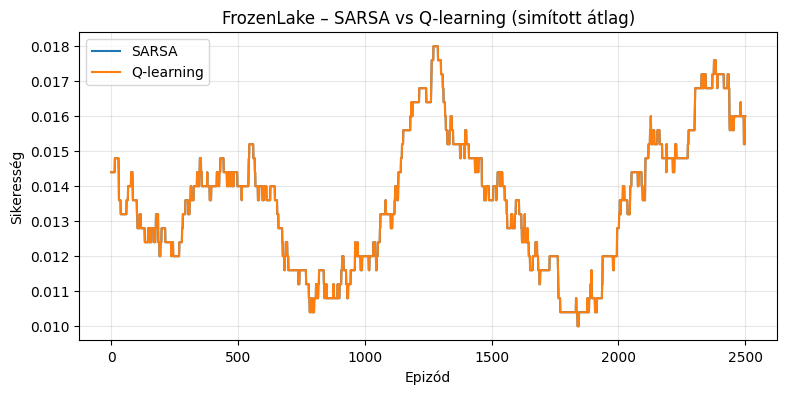

In [4]:
plt.figure(figsize=(9, 4))

plt.plot(
    moving_average(
        aggregate_by_episode(sarsa, "success")[0].values, 500
    ),
    label="SARSA"
)
plt.plot(
    moving_average(
        aggregate_by_episode(qlearning, "success")[0].values, 500
    ),
    label="Q-learning"
)

plt.xlabel("Epizód")
plt.ylabel("Sikeresség")
plt.title("FrozenLake – SARSA vs Q-learning (simított átlag)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Összességében a FrozenLake környezetben mindkét algoritmus
képes sikeres policy-t tanulni.

A SARSA stabilabb, míg a Q-learning agresszívebb frissítései
nagyobb szórást eredményeznek.
